In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load user_signup_data file as a pandas dataFrame

df1 = pd.read_csv('user_signup_data.csv',index_col=0)

In [4]:
# Check the first rows of user_signup_data file 

df1.head(1)

,cpc,organic,affiliate,social,signup_date
userid,,,,,
e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01


In [5]:
# set userid as a column & set a new index for data frame

df1 = df1.reset_index()
df1.head(1)

,userid,cpc,organic,affiliate,social,signup_date
0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01


In [6]:
# Load tv_campaigns file as a pandas dataFrame

df2 = pd.read_csv('tv_campaigns.csv',index_col=0)

In [7]:
# Check the first rows of tv_campaigns file 

df2.head(2)

,campaign
date,
2017-01-24,tv campaign
2017-02-26,tv campaign


In [8]:
# Reset the index of tv_campaigns to make date a new column & save it

df2 = df2.reset_index()
df2.head(1)

,date,campaign
0,2017-01-24,tv campaign


In [9]:
# Left join the two data sets on signup_date & date 

df3=pd.merge(df1,df2,how='left', left_on='signup_date', right_on='date')
df3.head(3)

,userid,cpc,organic,affiliate,social,signup_date,date,campaign
0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01,NaN,NaN
1,321c18f1-c58e-488d-a60a-462dfc9d38aa,1,0,1,0,2017-01-10,NaN,NaN
2,3d03c163-d14b-49da-873a-a54cc3b400e3,0,0,1,1,2017-03-24,NaN,NaN


In [10]:
# Replace all NaN values with zeros 

df3.fillna(0, inplace=True)
df3.head(3)

,userid,cpc,organic,affiliate,social,signup_date,date,campaign
0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01,0,0
1,321c18f1-c58e-488d-a60a-462dfc9d38aa,1,0,1,0,2017-01-10,0,0
2,3d03c163-d14b-49da-873a-a54cc3b400e3,0,0,1,1,2017-03-24,0,0


In [11]:
# Replace tv campaign with 1

df3 = df3.replace('tv campaign',1)
df3.head(3)

,userid,cpc,organic,affiliate,social,signup_date,date,campaign
0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01,0,0
1,321c18f1-c58e-488d-a60a-462dfc9d38aa,1,0,1,0,2017-01-10,0,0
2,3d03c163-d14b-49da-873a-a54cc3b400e3,0,0,1,1,2017-03-24,0,0


In [12]:
# Drop date column as we already have campaign & signup_date

df3.drop('date' , axis=1 , inplace = True)
df3.head(3)

,userid,cpc,organic,affiliate,social,signup_date,campaign
0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01,0
1,321c18f1-c58e-488d-a60a-462dfc9d38aa,1,0,1,0,2017-01-10,0
2,3d03c163-d14b-49da-873a-a54cc3b400e3,0,0,1,1,2017-03-24,0


In [299]:
# Export file to CSV & import it to tableau for data Exploration

df3.to_csv('n26_v1.csv')

In [13]:
# Import library to use HTML syntax

from IPython.core.display import display, HTML

In [14]:
# Link to visualize a dashboard developed in Tableau

display(HTML('<h1>DATA EXPLORATION IN TABLEAU</h1>'))
print("Here's a link:")
display(HTML("<a href='http://www.google.com' target='_blank'>www.google.com</a>"))
print("some more printed text ...")

Here's a link:


some more printed text ...


DATA ANALYSIS

In [15]:
# General overview of the user acquisition contribution of tv campaign

total_signup_nocamp = df3['campaign'].value_counts()[0]
total_signup_withcamp = df3['campaign'].value_counts()[1]

print('Total number of customers NOT attributed to tv campaign = {x}'.format(x=total_signup_nocamp))
print('Total number of customers attributed to tv campaign = {x}'.format(x=total_signup_withcamp))

Total number of customers NOT attributed to tv campaign = 4450
Total number of customers attributed to tv campaign = 550


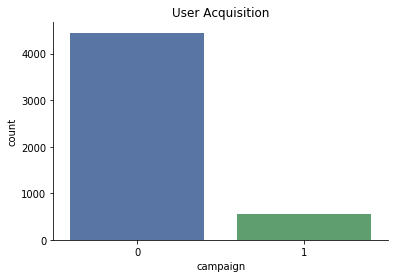

In [18]:
# User Acquisition countplot for contribution of tv campaign

plt.figure(figsize=(6,4))
plt.title('User Acquisition')
sns.countplot(x='campaign',data=df3,palette='deep')
sns.despine()

Complementary visualization in tableau here ...

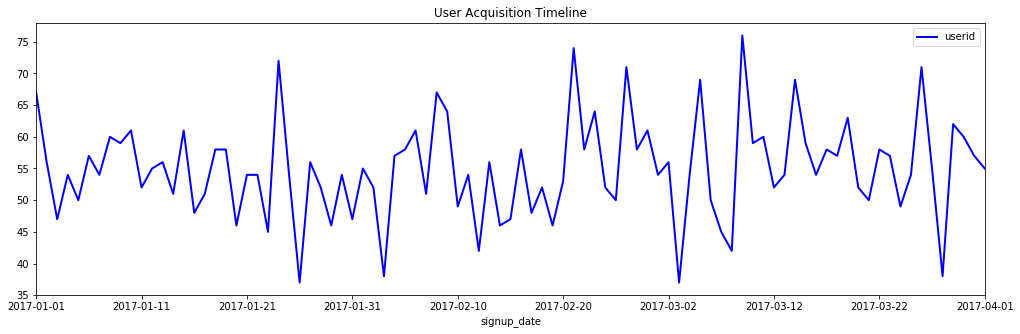

In [19]:
# Visualization of user acquisition over time

df4 = df3.groupby('signup_date').count()
df4.plot.line(x=df4.index,y='userid',figsize=(17,5),lw=2, color='b' , title = 'User Acquisition Timeline')

more detailanalysis here ... link

In [410]:
# Analisys of the different marketing channels

display(HTML('<h2>Channel Overview</h2>'))

In [411]:
# Create a new pandas dataFrame to do analisys 

df5 = df3

In [412]:
# Create a new column named "total" which will be the sum of the different channels

df5['total'] = df5['cpc'] + df5['organic'] + df5['affiliate'] + df5['social']
df5.head()

,userid,cpc,organic,affiliate,social,signup_date,campaign,total
0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01,0,2
1,321c18f1-c58e-488d-a60a-462dfc9d38aa,1,0,1,0,2017-01-10,0,2
2,3d03c163-d14b-49da-873a-a54cc3b400e3,0,0,1,1,2017-03-24,0,2
3,3acb5a84-4375-405b-9a8b-bfb8979ab9bc,1,0,0,0,2017-03-06,0,1
4,1b488764-6874-4483-8e70-815feb07b154,1,0,0,0,2017-03-03,0,1


In [437]:
# Group & sum the different marketing channels per user 

print ('Number of Users with 1 channel = {x}'.format(x=(df5.groupby('total').count()['userid'][1])))
print ('Number of Users with 2 channels = {y}'.format(y=(df5.groupby('total').count()['userid'][2])))
print ('Number of Users with 3 channels = {z}'.format(z=(df5.groupby('total').count()['userid'][3])))

Number of Users with 1 channel = 1297
Number of Users with 2 channels = 3347
Number of Users with 3 channels = 356


In [452]:
for index , row in df3.iterrows():
    print(df3[df3['signup_date']== df3.iloc[index]['signup_date']['cpc'].value_counts()[1],
          df3[df3['signup_date']== df3.iloc[index]['signup_date']['organic'].value_counts()[1],
          df3[df3['signup_date']== df3.iloc[index]['signup_date'][ 'affiliate'].value_counts()[1],
          df3[df3['signup_date']== df3.iloc[index]['signup_date']['social'].value_counts()[1])

SyntaxError: invalid syntax (<ipython-input-452-5fd6d100ab74>, line 5)

In [ ]:
for index , row in df3.iterrows():
   print( df3[df3['signup_date'] == df3.iloc[index]['signup_date']]) 

                                    userid  cpc  organic  affiliate  social  \
0     e0912256-b48a-45c0-afec-23350d341abd    1        0          0       1   
62    842607cf-1d33-487b-9990-a59322be6dbc    0        0          1       1   
213   9c993722-9877-41aa-93b6-824dd6a408d6    1        0          1       0   
234   c77ca3a1-3ef3-496c-9528-0a6408bef361    1        0          1       0   
239   cb7e5418-6480-4668-bb33-642436c81db3    1        0          1       0   
409   cc859fd1-8a31-4c2a-a8b0-21804af538bd    0        0          1       0   
500   094f8c41-bc91-4563-9624-de1d458629b7    0        0          1       0   
554   25d2b714-749f-4ba7-b95d-e57aa53fdec1    0        0          1       1   
693   28dd8a9d-d0fa-4812-880e-b6292b2d734e    0        0          1       0   
776   b13601e8-64d1-4287-9741-89df6488fcf7    0        0          1       0   
856   f73a6624-9927-4e96-8daa-7528ca1d0a01    0        0          1       1   
1114  6dea54fa-953b-4176-9b45-526835113349    1     

In [451]:
# Example of previous cell : This user has 3 channel attributions cpc, organic & social

df5.iloc[4975]['signup_date']

'2017-02-06'

In [302]:
df_total3 = df3[df3['total']==3]

In [303]:
print(df_total3['total'].count())
print( df_total3['cpc'].value_counts())
print(df_total3['organic'].value_counts())
print(df_total3['affiliate'].value_counts())
print(df_total3['social'].value_counts())

356
1    293
0     63
Name: cpc, dtype: int64
0    239
1    117
Name: organic, dtype: int64
1    302
0     54
Name: affiliate, dtype: int64
1    356
Name: social, dtype: int64


In [304]:
df_total2 = df3[df3['total']==2]

In [305]:
df_total1 = df3[df3['total']==1].count()

In [306]:
1297 + 3347 +356

5000

EXPLORATION OF THE DATA

In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
%matplotlib inline

In [62]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 6 columns):
cpc            5000 non-null int64
organic        5000 non-null int64
affiliate      5000 non-null int64
social         5000 non-null int64
signup_date    5000 non-null object
campaign       5000 non-null int64
dtypes: int64(5), object(1)
memory usage: 433.4+ KB


In [141]:
df3.head(5)

,cpc,organic,affiliate,social,signup_date,campaign,total
0,1,0,0,1,2017-02-01,0,2
1,1,0,1,0,2017-01-10,0,2
2,0,0,1,1,2017-03-24,0,2
3,1,0,0,0,2017-03-06,0,1
4,1,0,0,0,2017-03-03,0,1


In [152]:
df3[df3['signup_date'] == '2017-01-01']['cpc'].value_counts()

0    43
1    24
Name: cpc, dtype: int64

In [121]:
df5 = df3.groupby('signup_date').count()
df5.head()

,cpc,organic,affiliate,social,campaign,total
signup_date,,,,,,
2017-01-01,67,67,67,67,67,67
2017-01-02,56,56,56,56,56,56
2017-01-03,47,47,47,47,47,47
2017-01-04,54,54,54,54,54,54
2017-01-05,50,50,50,50,50,50


In [326]:
df5.drop('campaign' , axis=1 , inplace = True)
df5.head(2)

,total
signup_date,
2017-01-01,67
2017-01-02,56


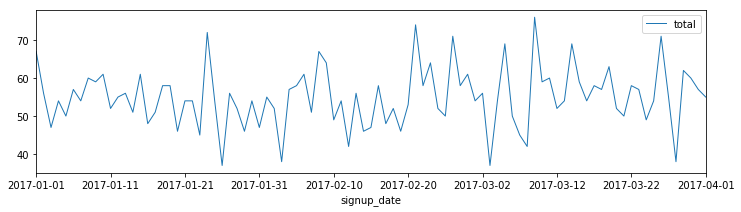

In [327]:
df5.plot.line(x=df5.index,y='total',figsize=(12,3),lw=1)

In [177]:
df3[df3['signup_date']=='2017-01-01']['cpc'].value_counts()[1]

24

In [ ]:
[df3.groupby('signup_date')]

In [173]:
var[1]

24

In [161]:
df6 = df3.groupby('signup_date')
df6.head()

,cpc,organic,affiliate,social,signup_date,campaign,total
0,1,0,0,1,2017-02-01,0,2
1,1,0,1,0,2017-01-10,0,2
2,0,0,1,1,2017-03-24,0,2
3,1,0,0,0,2017-03-06,0,1
4,1,0,0,0,2017-03-03,0,1
5,0,0,1,0,2017-03-14,1,1
6,1,0,0,1,2017-03-26,1,2
7,0,1,0,1,2017-01-01,1,2
8,0,0,1,0,2017-03-09,0,1
9,0,0,1,1,2017-02-10,0,2


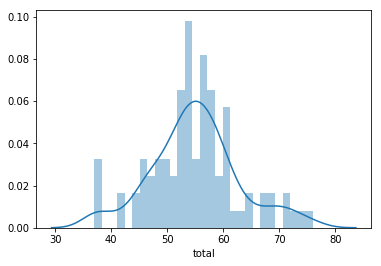

In [320]:
sns.distplot(df5['total'], bins = df5['total'].nunique())

In [129]:
df5['total'].nunique()

29

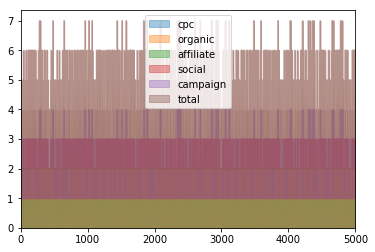

In [108]:
df3.plot.area(alpha=0.4)

In [61]:
df3['cpc'].value_counts()

0    3342
1    1658
Name: cpc, dtype: int64

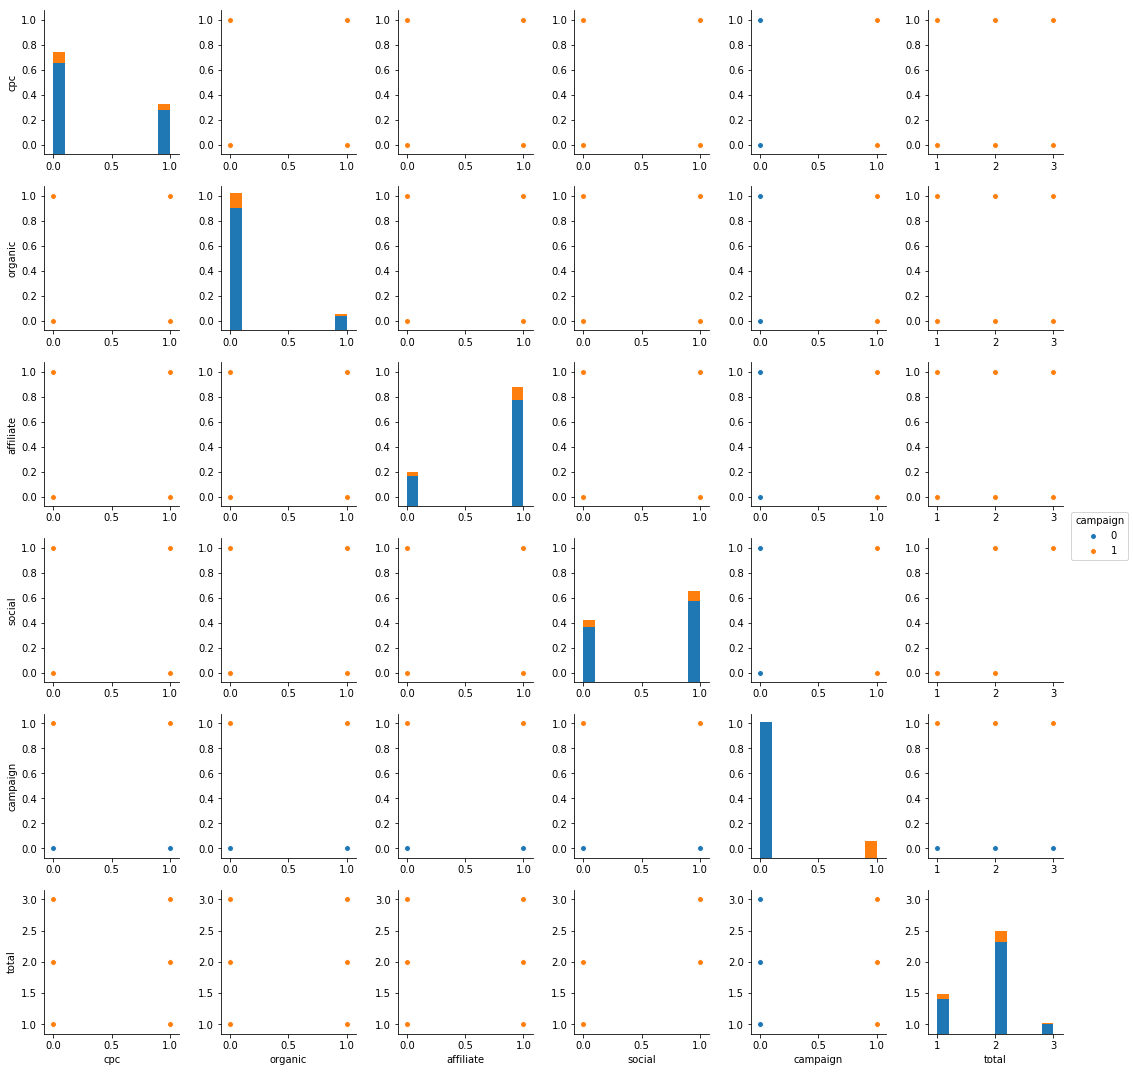

In [110]:
sns.pairplot(df3, hue = 'campaign') 

In [181]:
exam_data = [{'name':'Anastasia', 'score':12.5}, {'name':'Dima','score':9}, {'name':'Katherine','score':16.5}]
df = pd.DataFrame(exam_data)
for index, row in df.iterrows():
    print(row['name'], row['score'] , index)


Anastasia 12.5 0
Dima 9.0 1
Katherine 16.5 2


In [261]:
df3[df3['signup_date']== '2017.01.01']

,cpc,organic,affiliate,social,signup_date,campaign,total


In [223]:
df7 = df5.reset_index()

In [256]:
df3[df3['signup_date']=='2017-01-01'].count()

cpc            67
organic        67
affiliate      67
social         67
signup_date    67
campaign       67
total          67
dtype: int64

In [257]:
df3['cpc'].value_counts().head(5)

0    3342
1    1658
Name: cpc, dtype: int64

In [262]:
for index , row in df5.iterrows():
    print(df3[df3['signup_date']== index]['cpc'].value_counts()[1],
          df3[df3['signup_date']== index]['organic'].value_counts()[1],
          df3[df3['signup_date']== index][ 'affiliate'].value_counts()[1],
          df3[df3['signup_date']== index]['social'].value_counts()[1])

24 10 45 36
17 3 46 31
11 6 37 26
20 5 39 33
14 6 36 30
19 5 48 25
15 8 43 30
24 7 42 35
17 5 47 33
21 4 53 28
16 6 42 32
21 5 46 37
17 5 47 29
17 5 43 31
18 8 52 36
16 4 38 28
20 6 40 28
19 3 50 35
22 4 43 35
18 5 30 29
12 7 44 34
21 6 46 36
17 7 32 27
28 9 53 41
15 10 42 32
15 3 28 23
17 7 45 33
14 3 39 33
10 4 36 35
15 6 43 29
21 4 32 33
19 4 45 33
20 9 38 27
8 1 33 25
23 8 37 35
15 8 43 35
23 10 46 34
20 4 38 39
26 9 49 37
20 6 50 37
15 4 39 33
13 8 43 34
20 3 31 24
20 6 44 33
15 9 32 26
16 2 40 27
21 8 41 36
18 6 35 25
15 10 41 28
15 5 34 26
15 6 41 35
31 6 59 39
15 3 50 31
26 5 49 33
10 3 44 35
17 6 36 27
20 6 61 40
23 7 41 37
18 3 49 33
16 6 42 35
21 3 42 36
15 5 25 22
20 4 44 27
26 5 53 40
18 5 34 24
21 5 35 25
10 4 36 25
32 11 52 47
17 4 50 35
20 7 46 32
19 7 36 34
24 6 43 32
23 7 55 44
18 8 44 30
17 8 38 39
22 3 46 37
19 5 44 34
14 6 55 42
17 10 37 37
14 3 44 30
13 5 47 38
12 4 51 32
12 6 40 34
15 1 49 40
24 7 55 48
22 4 43 36
13 8 26 26
26 4 45 38
15 5 51 33
21 6 46 34
14 6 

In [190]:
24+10+ 45+ 36

115

In [192]:
df3[df3['signup_date']== '2017-01-01' ]['organic'].value_counts()[1]

10

In [219]:
df_test = df3[df3['signup_date']== '2017-01-01' ]['organic']

In [217]:
df_test = df3[df3['signup_date']== '2017-01-01' ]['organic'].value_counts()

In [220]:
df_test

7       1
137     0
147     0
199     0
256     0
290     0
315     0
339     0
587     0
619     0
703     0
972     0
1069    0
1132    0
1171    0
1180    0
1336    0
1407    0
1426    0
1431    1
1504    0
1627    1
1818    0
1838    1
1932    0
2090    0
2099    0
2385    0
2491    0
2514    0
       ..
3198    0
3204    0
3370    0
3426    1
3480    1
3568    0
3760    0
3785    0
3831    0
3860    0
3985    0
4005    0
4025    0
4128    0
4145    0
4217    0
4224    0
4231    1
4389    0
4410    1
4425    0
4562    0
4723    1
4794    0
4807    0
4862    0
4874    0
4899    0
4907    0
4967    0
Name: organic, Length: 67, dtype: int64

In [216]:
df_test.axes

[Int64Index([   7,  137,  147,  199,  256,  290,  315,  339,  587,  619,  703,
              972, 1069, 1132, 1171, 1180, 1336, 1407, 1426, 1431, 1504, 1627,
             1818, 1838, 1932, 2090, 2099, 2385, 2491, 2514, 2603, 2678, 2684,
             2809, 2960, 2978, 3066, 3198, 3204, 3370, 3426, 3480, 3568, 3760,
             3785, 3831, 3860, 3985, 4005, 4025, 4128, 4145, 4217, 4224, 4231,
             4389, 4410, 4425, 4562, 4723, 4794, 4807, 4862, 4874, 4899, 4907,
             4967],
            dtype='int64')]

In [199]:
df3[df3['signup_date']== '2017-01-01' ]['affiliate'].value_counts()

1    45
0    22
Name: affiliate, dtype: int64

In [198]:
df3[df3['signup_date']== '2017-01-01' ]['social'].value_counts()

36

In [280]:
df3.corr()

,cpc,organic,affiliate,social,campaign,total
cpc,1.000000,-0.001533,-0.567837,-0.175666,0.011704,0.273699
organic,-0.001533,1.000000,-0.378763,-0.094708,0.004003,0.185477
affiliate,-0.567837,-0.378763,1.000000,-0.011317,-0.011824,0.048309
social,-0.175666,-0.094708,-0.011317,1.000000,-0.006972,0.688785
campaign,0.011704,0.004003,-0.011824,-0.006972,1.000000,-0.002930
total,0.273699,0.185477,0.048309,0.688785,-0.002930,1.000000


In [25]:
df3.head()

,userid,cpc,organic,affiliate,social,signup_date,campaign
0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01,0
1,321c18f1-c58e-488d-a60a-462dfc9d38aa,1,0,1,0,2017-01-10,0
2,3d03c163-d14b-49da-873a-a54cc3b400e3,0,0,1,1,2017-03-24,0
3,3acb5a84-4375-405b-9a8b-bfb8979ab9bc,1,0,0,0,2017-03-06,0
4,1b488764-6874-4483-8e70-815feb07b154,1,0,0,0,2017-03-03,0


In [19]:
df9 = df3

In [20]:
df9.drop('userid' , axis=1 , inplace = True)

In [22]:
df10 = df9.corr()

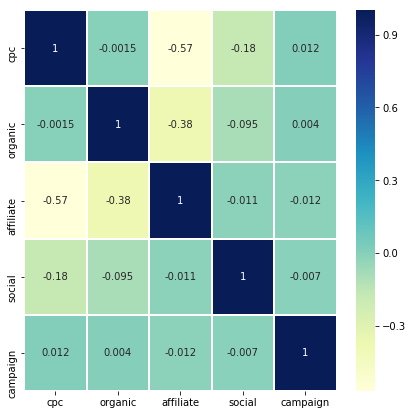

In [36]:
plt.figure(figsize=(7,7))

sns.heatmap(df9.corr() ,cmap='YlGnBu',linecolor='white',linewidths=1 ,annot=True)

In [23]:
df10.head()

,cpc,organic,affiliate,social,campaign
cpc,1.000000,-0.001533,-0.567837,-0.175666,0.011704
organic,-0.001533,1.000000,-0.378763,-0.094708,0.004003
affiliate,-0.567837,-0.378763,1.000000,-0.011317,-0.011824
social,-0.175666,-0.094708,-0.011317,1.000000,-0.006972
campaign,0.011704,0.004003,-0.011824,-0.006972,1.000000


In [24]:
df10.drop('campaign' , axis=1 , inplace = True)

In [25]:
df10.head()

,cpc,organic,affiliate,social
cpc,1.000000,-0.001533,-0.567837,-0.175666
organic,-0.001533,1.000000,-0.378763,-0.094708
affiliate,-0.567837,-0.378763,1.000000,-0.011317
social,-0.175666,-0.094708,-0.011317,1.000000
campaign,0.011704,0.004003,-0.011824,-0.006972


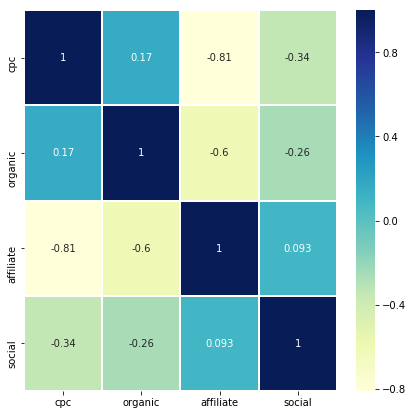

In [28]:
plt.figure(figsize=(7,7))

sns.heatmap(df10.corr() ,cmap='YlGnBu',linecolor='white',linewidths=1 ,annot=True)

In [29]:
df10.head()

,cpc,organic,affiliate,social
cpc,1.000000,-0.001533,-0.567837,-0.175666
organic,-0.001533,1.000000,-0.378763,-0.094708
affiliate,-0.567837,-0.378763,1.000000,-0.011317
social,-0.175666,-0.094708,-0.011317,1.000000
campaign,0.011704,0.004003,-0.011824,-0.006972


In [31]:
df10 =df3

In [32]:
df10.drop('campaign' , axis=1 , inplace = True)

In [36]:
df10.head()

,cpc,organic,affiliate,social
0,1,0,0,1
1,1,0,1,0
2,0,0,1,1
3,1,0,0,0
4,1,0,0,0


In [35]:
df10.drop('signup_date' , axis=1 , inplace = True)

In [37]:
df10.to_csv('channel_correlation.csv')